In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Average homeruns per year

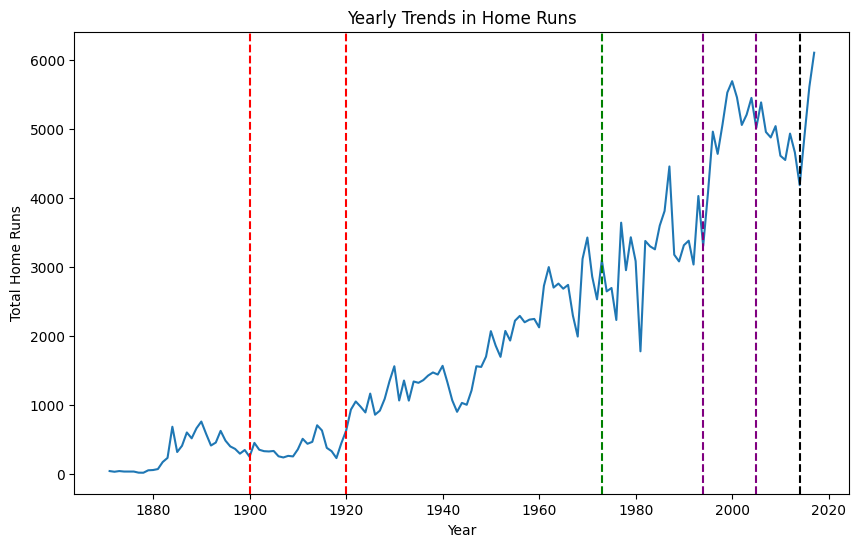

In [22]:
df = pd.read_csv('core/Batting.csv')
batting_df = df[df['HR'] > 0]
home_runs_per_year = batting_df.groupby('yearID')['HR'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='yearID', y='HR', data=home_runs_per_year)
plt.axvline(x=1920, color='red', linestyle='--')  # End of Dead-ball era
plt.axvline(x=1900, color='red', linestyle='--')  # Start of Dead-ball era
plt.axvline(x=1973, color='green', linestyle='--')  # DH rule introduced
plt.axvline(x=1994, color='purple', linestyle='--')  # Start of Steroids era
plt.axvline(x=2005, color='purple', linestyle='--')  # End of Steroids era
plt.axvline(x=2014, color='black', linestyle='--')  # Start of Contemporary era
plt.title('Yearly Trends in Home Runs')
plt.xlabel('Year')
plt.ylabel('Total Home Runs')
plt.show()


### Average attendance per year

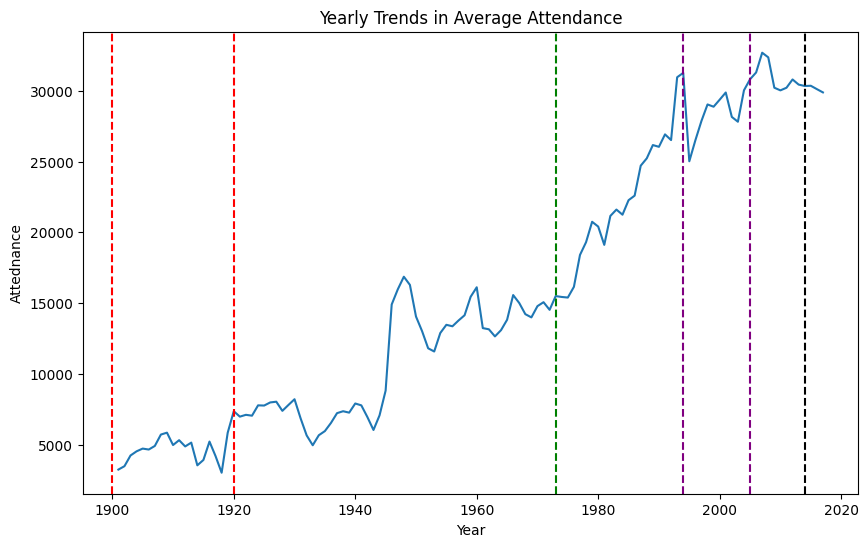

In [23]:
df = pd.read_csv('core/teams.csv')
df.attendance = df.attendance/df.Ghome
attendance_per_year = df.groupby('yearID')['attendance'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='yearID', y='attendance', data=attendance_per_year)
plt.axvline(x=1920, color='red', linestyle='--') #Dead-ball
plt.axvline(x=1900, color='red', linestyle='--') 
plt.axvline(x=1973, color='green', linestyle='--') #DH rule
plt.axvline(x=1994, color='purple', linestyle='--') #Steroids
plt.axvline(x=2005, color='purple', linestyle='--')
plt.axvline(x=2014, color='black', linestyle='--')
plt.title('Yearly Trends in Average Attendance')
plt.xlabel('Year')
plt.ylabel('Attednance')
plt.show()

## Winning percentage vs attendance

Text(0.5, 0, 'Winning percentage in that year')

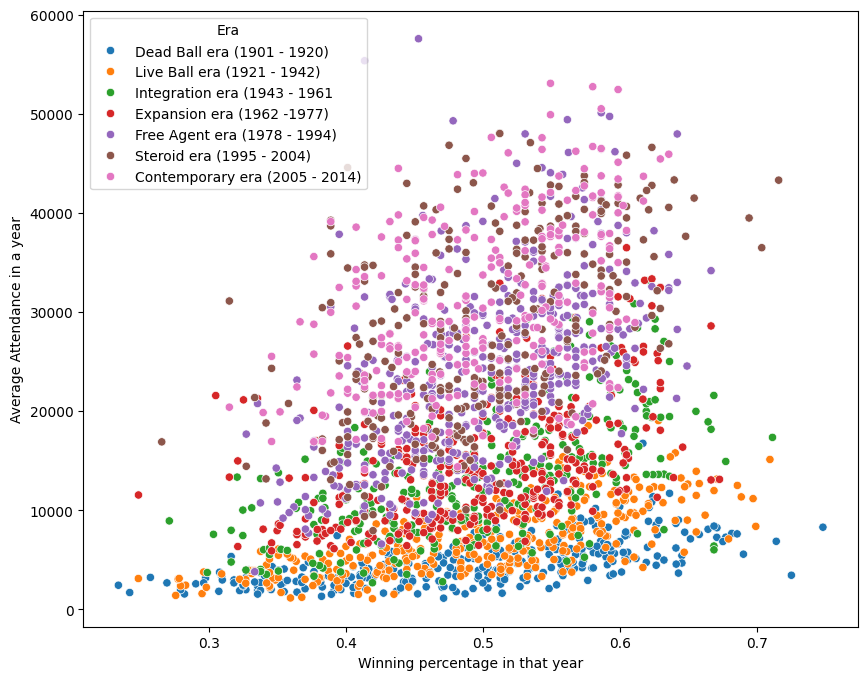

In [24]:
teams = pd.read_csv('core/Teams.csv')
teams.attendance = teams.attendance/teams.Ghome
teams['WP']=teams.W/ teams.G
def classify_era(year):
    if 1901 <= year <= 1920:
        return "Dead Ball era (1901 - 1920)"
    elif 1921 <= year <= 1942:
        return "Live Ball era (1921 - 1942)"
    elif 1943 <= year <= 1961:
        return "Integration era (1943 - 1961"
    elif 1962 <= year <= 1977:
        return "Expansion era (1962 -1977)"
    elif 1978 <= year <= 1994:
        return "Free Agent era (1978 - 1994)"
    elif 1995 <= year <= 2004:
        return "Steroid era (1995 - 2004)"
    elif 2005 <= year <= 2014:
        return "Contemporary era (2005 - 2014)"
    else:
        return None
teams['Era'] = teams.yearID.apply(classify_era)
plt.figure (figsize = (10,8))
sns.scatterplot(data=teams, x = 'WP', y ='attendance', hue = 'Era')
plt.ylabel('Average Attendance in a year')
plt.xlabel('Winning percentage in that year')

### Regular vs post season batting averages

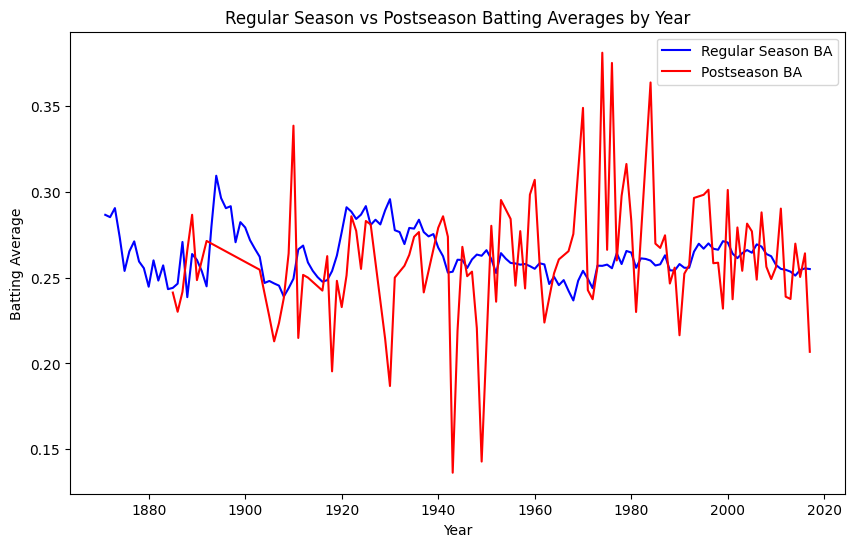

In [25]:
df = pd.read_csv('core/Batting.csv')
post_df = pd.read_csv('core/BattingPost.csv')
batting_df = df[df['AB'] > 0]
batting_post_df = post_df[post_df['AB'] > 20]
batting_avg = batting_df.groupby('yearID').agg({'H': 'sum', 'AB': 'sum'})
batting_avg['BA'] = batting_avg['H'] / batting_avg['AB']
batting_post_avg = batting_post_df.groupby('yearID').agg({'H': 'sum', 'AB': 'sum'})
batting_post_avg['BA'] = batting_post_avg['H'] / batting_post_avg['AB']
plt.figure(figsize=(10, 6))
plt.plot(batting_avg.index, batting_avg['BA'], label='Regular Season BA', color='blue')
plt.plot(batting_post_avg.index, batting_post_avg['BA'], label='Postseason BA', color='red')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Regular Season vs Postseason Batting Averages by Year')
plt.legend()
plt.show()

### Regular Season vs Post Season HBP per Game by Year

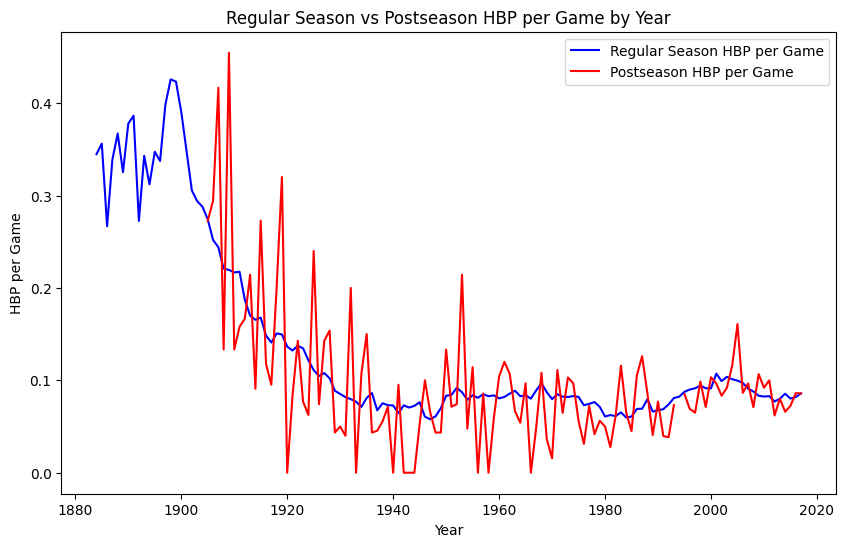

In [30]:

df = pd.read_csv('core/Pitching.csv')
post_df = pd.read_csv('core/PitchingPost.csv')
pitching_df = df.dropna(subset=['HBP'])
pitching_post_df = post_df.dropna(subset=['HBP'])
pitching_regular_hbp = pitching_df.groupby('yearID').agg({'HBP': 'sum', 'G': 'sum'}).reset_index()
pitching_regular_hbp['HBP_per_game'] = pitching_regular_hbp['HBP'] / pitching_regular_hbp['G']
pitching_regular_hbp.rename(columns={'HBP': 'RegularSeason_HBP', 'G': 'RegularSeason_Games'}, inplace=True)
pitching_post_hbp = pitching_post_df.groupby('yearID').agg({'HBP': 'sum', 'G': 'sum'}).reset_index()
pitching_post_hbp['HBP_per_game'] = pitching_post_hbp['HBP'] / pitching_post_hbp['G']
pitching_post_hbp.rename(columns={'HBP': 'PostSeason_HBP', 'G': 'PostSeason_Games'}, inplace=True)
plt.figure(figsize=(10, 6))
hbp_comparison = pd.merge(
    pitching_regular_hbp[['yearID', 'RegularSeason_HBP', 'HBP_per_game']], 
    pitching_post_hbp[['yearID', 'PostSeason_HBP', 'HBP_per_game']], 
    on='yearID', how='outer', suffixes=('_regular', '_post'))
plt.plot(hbp_comparison['yearID'], hbp_comparison['HBP_per_game_regular'], label='Regular Season HBP per Game', color='blue')
plt.plot(hbp_comparison['yearID'], hbp_comparison['HBP_per_game_post'], label='Postseason HBP per Game', color='red')

plt.xlabel('Year')
plt.ylabel('HBP per Game')
plt.title('Regular Season vs Postseason HBP per Game by Year')
plt.legend()
plt.show()